In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from statsmodels.tsa.arima_model import ARIMA



In [5]:
df = pd.read_csv(Path('Resources/final_data.csv', parse_date=['Date'], index_col=['Dates']),low_memory = False)
                                                                                

df.head()

,Date,Store,Sales,Customer_count
0,01/01/2013,16.0,167566.0,26.0
1,01/01/2013,19.0,142405.0,26.0
2,01/01/2013,22.0,106067.0,26.0
3,01/01/2013,29.0,150114.0,26.0
4,01/01/2013,35.0,203724.0,26.0


In [6]:
df= df.dropna()

In [7]:
#x = df.drop(columns=['Customers','Promo', 'StateHoliday', 'SchoolHoliday'])
x=df

In [8]:
x.set_index('Date', inplace=True)

In [9]:
x.head(10)

,Store,Sales,Customer_count
Date,,,
01/01/2013,16.0,167566.0,26.0
01/01/2013,19.0,142405.0,26.0
01/01/2013,22.0,106067.0,26.0
01/01/2013,29.0,150114.0,26.0
01/01/2013,35.0,203724.0,26.0
01/01/2013,60.0,167099.0,26.0
01/01/2013,65.0,113770.0,26.0
01/01/2013,70.0,155454.0,26.0
01/01/2013,87.0,142555.0,26.0


In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(x['Sales'].dropna())
print('p-value: ', result[1])

result = adfuller(x['Sales'].diff().dropna())
print('p-value: ', result[1])

result = adfuller(x['Sales'].diff().diff().dropna())
print('p-value: ', result[1])




#result = adfuller(x['Sales'])
#print('p-value: ', result[1])

#result = adfuller(x.['Sales'].diff()dropna())
#('p-value: ', result[1])

#result = adfuller(x.['Sales'].diff().diff().dropna())
#('p-value: ', result[1])




p-value:  2.355200881108615e-10
p-value:  6.930893343465532e-21
p-value:  0.0


In [11]:
#f=pltfigure()

In [12]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\Shabana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shabana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shabana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 2542
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -32247.095
Date:                Thu, 05 Oct 2023   AIC                          64500.190
Time:                        14:54:04   BIC                          64517.711
Sample:                             0   HQIC                         64506.546
                               - 2542                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0746      0.022     -3.370      0.001      -0.118      -0.031
ma.L1         -0.9355      0.009    -99.643      0.000      -0.954      -0.917
sigma2      7.151e+09   2.14e-12   3.34e+21      0.000    7.15e+09    7.15e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):              5145.21
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             1.99
Prob(H) (two-sided):                  0.75   Kurtosis:                         8.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.32e+36. Standard errors may be unstable.
"""

In [13]:
# This is model 2
model_no2=ARIMA(df['Sales'],order=(1,2,2))
model_fit=model_no2.fit()
model_fit.summary()

C:\Users\Shabana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shabana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shabana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shabana\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 2542
Model:                 ARIMA(1, 2, 2)   Log Likelihood              -32400.132
Date:                Thu, 05 Oct 2023   AIC                          64808.263
Time:                        14:54:06   BIC                          64831.623
Sample:                             0   HQIC                         64816.737
                               - 2542                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0448      0.035     -1.283      0.199      -0.113       0.024
ma.L1         -1.9376      0.012   -161.728      0.000      -1.961      -1.914
ma.L2          0.9471      0.012     77.617      0.000       0.923       0.971
sigma2      1.047e+10   7.55e-13   1.39e+22      0.000    1.05e+10    1.05e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2534.31
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             1.45
Prob(H) (two-sided):                  0.55   Kurtosis:                         6.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.5e+36. Standard errors may be unstable.
"""

In [14]:
x['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
x['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)
x.head()

,Store,Sales,Customer_count,Sales First Difference,Seasonal First Difference
Date,,,,,
01/01/2013,16.0,167566.0,26.0,NaN,NaN
01/01/2013,19.0,142405.0,26.0,-25161.0,NaN
01/01/2013,22.0,106067.0,26.0,-36338.0,NaN
01/01/2013,29.0,150114.0,26.0,44047.0,NaN
01/01/2013,35.0,203724.0,26.0,53610.0,NaN


In [15]:
x= x.fillna(0)

<Axes: xlabel='Date'>

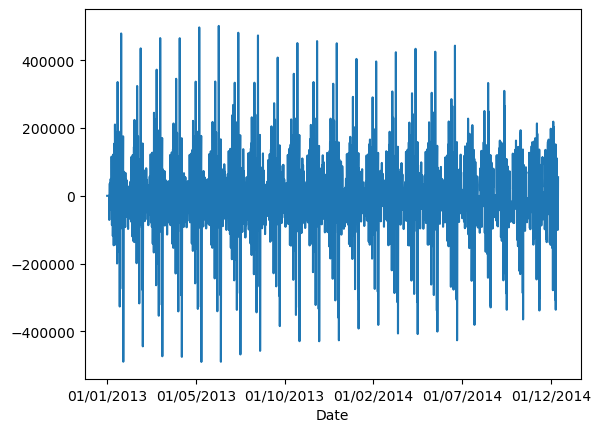

In [16]:
x['Seasonal First Difference'].plot()

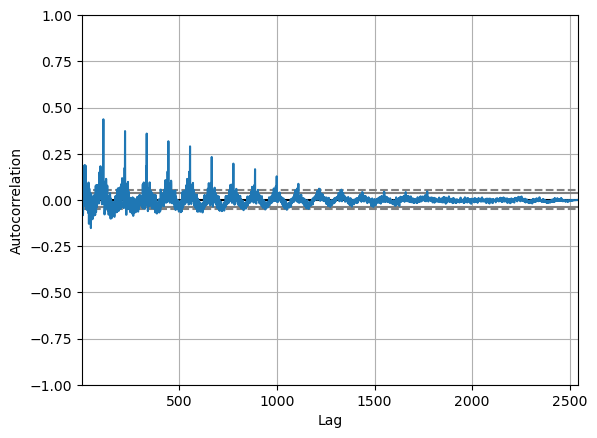

In [17]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [18]:
x

,Store,Sales,Customer_count,Sales First Difference,Seasonal First Difference
Date,,,,,
01/01/2013,16.0,167566.0,26.0,0.0,0.0
01/01/2013,19.0,142405.0,26.0,-25161.0,0.0
01/01/2013,22.0,106067.0,26.0,-36338.0,0.0
01/01/2013,29.0,150114.0,26.0,44047.0,0.0
01/01/2013,35.0,203724.0,26.0,53610.0,0.0
...,...,...,...,...,...
01/12/2014,1072.0,198614.0,25.0,-83216.0,37049.0
01/12/2014,1081.0,224724.0,31.0,26110.0,20216.0
01/12/2014,1086.0,187137.0,25.0,-37587.0,-100726.0


In [19]:
x['forecast_sales']=model_fit.predict()
#x['forecast_sales']=model_fit.predict(start=90,end=103,dynamic=True)


<Axes: xlabel='Date'>

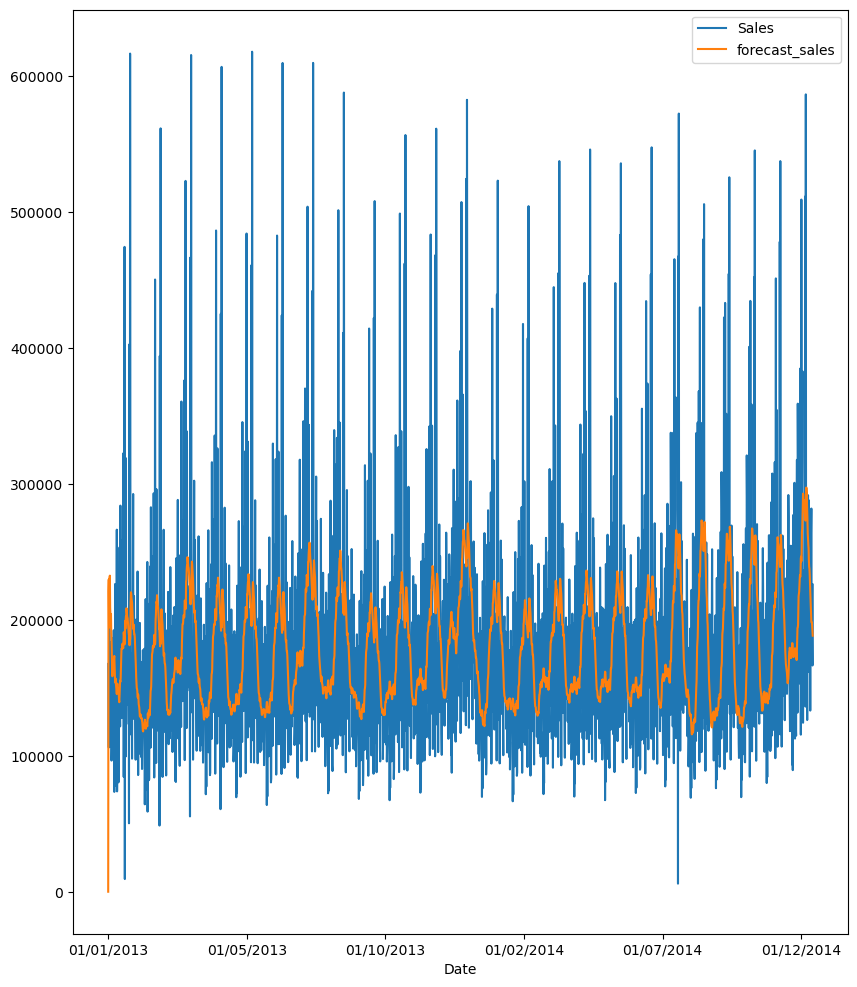

In [20]:
x[['Sales','forecast_sales']].plot(figsize=(10,12))

In [21]:
x

,Store,Sales,Customer_count,Sales First Difference,Seasonal First Difference,forecast_sales
Date,,,,,,
01/01/2013,16.0,167566.0,26.0,0.0,0.0,0.000000
01/01/2013,19.0,142405.0,26.0,-25161.0,0.0,221171.085024
01/01/2013,22.0,106067.0,26.0,-36338.0,0.0,229688.051384
01/01/2013,29.0,150114.0,26.0,44047.0,0.0,194344.793064
01/01/2013,35.0,203724.0,26.0,53610.0,0.0,200330.351202
...,...,...,...,...,...,...
01/12/2014,1072.0,198614.0,25.0,-83216.0,37049.0,198182.294028
01/12/2014,1081.0,224724.0,31.0,26110.0,20216.0,198173.652137
01/12/2014,1086.0,187137.0,25.0,-37587.0,-100726.0,194905.056205


In [22]:
x.index

Index(['01/01/2013', '01/01/2013', '01/01/2013', '01/01/2013', '01/01/2013',
       '01/01/2013', '01/01/2013', '01/01/2013', '01/01/2013', '01/01/2013',
       ...
       '01/12/2014', '01/12/2014', '01/12/2014', '01/12/2014', '01/12/2014',
       '01/12/2014', '01/12/2014', '01/12/2014', '01/12/2014', '01/12/2014'],
      dtype='object', name='Date', length=2542)

In [35]:
abc = pd.to_datetime('01/12/2014')
#abc = pd.to_datetime('01/12/2015')
abc

Timestamp('2014-01-12 00:00:00')

In [36]:
from  pandas.tseries.offsets import DateOffset

future_dates=[abc+ DateOffset(months=x)for x in range(0,12)]

In [37]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [38]:
future_datest_df.tail()

future_df=pd.concat([x,future_datest_df])

In [39]:
future_df

,Store,Sales,Customer_count,Sales First Difference,Seasonal First Difference,forecast_sales
01/01/2013,16.0,167566.0,26.0,0.0,0.0,0.000000
01/01/2013,19.0,142405.0,26.0,-25161.0,0.0,221171.085024
01/01/2013,22.0,106067.0,26.0,-36338.0,0.0,229688.051384
01/01/2013,29.0,150114.0,26.0,44047.0,0.0,194344.793064
01/01/2013,35.0,203724.0,26.0,53610.0,0.0,200330.351202
...,...,...,...,...,...,...
2014-08-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

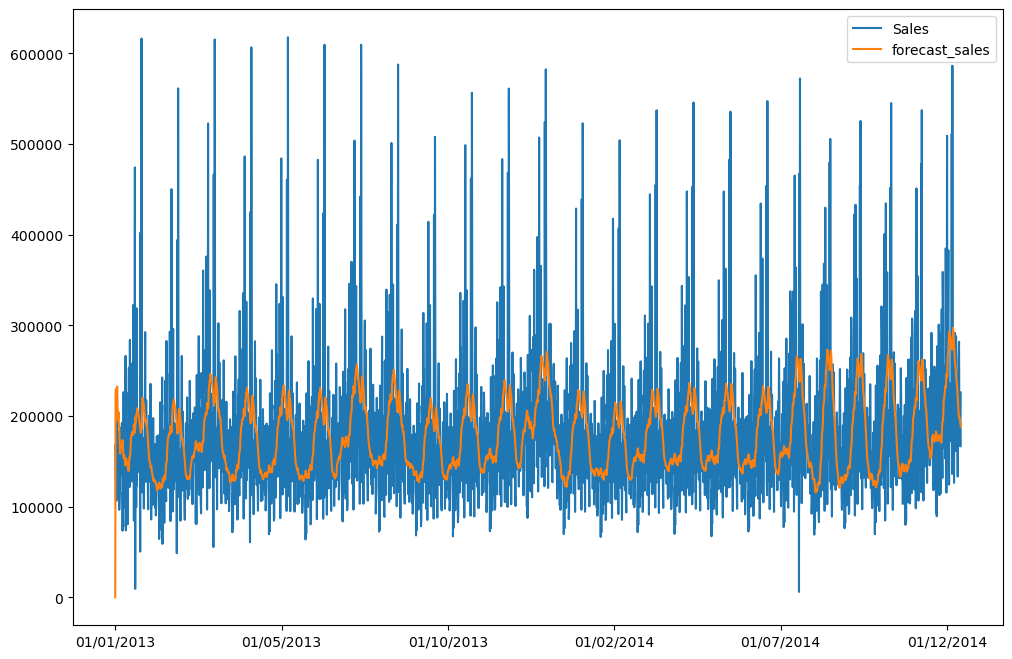

In [40]:
#future_df['forecast_sales_new'] = results.predict()
future_df[['Sales', 'forecast_sales']].plot(figsize=(12, 8))

In [41]:
future_df= future_df.drop(columns=['index'])

KeyError: "['index'] not found in axis"

In [42]:
future_df['predicted_sales'] = results.predict()

NameError: name 'results' is not defined